In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt



In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [12]:
x_values = np.linspace(-10, 10, 400)
y_values = sigmoid(x_values)


Text(0.5, 1.0, 'sigmoid function')

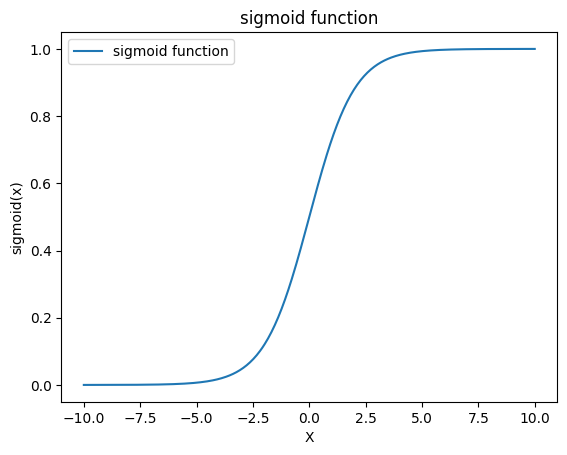

In [13]:
plt.plot(x_values,y_values,label='sigmoid function')
plt.xlabel("X")
plt.ylabel("sigmoid(x)")
plt.legend()
plt.title("sigmoid function")

In [14]:
def model(X, theta):
    return sigmoid(np.dot(X, theta))

In [15]:
def cost_function(X, y, theta):
    m = len(y)
    h = model(X, theta)
    return -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

In [16]:
def grad(X, y, theta):
    m = len(y)
    h = model(X, theta)
    return 1/m * np.dot(X.T, (h - y))

In [17]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [18]:
np.random.seed(42)
n_samples = 100
X1 = np.random.normal(2, 1, n_samples)
X2 = np.random.normal(4, 1, n_samples)
X = np.vstack((np.hstack((X1, X2)), np.hstack((np.ones(n_samples), np.zeros(n_samples))))).T
y = np.hstack((np.ones(n_samples), np.zeros(n_samples)))

# Add bias term (column of ones)
X_with_bias = np.c_[np.ones(X.shape[0]), X[:, 0]]

# Initialize parameters
theta = np.zeros(X_with_bias.shape[1])
learning_rate = 0.1
n_iterations = 500

# Run gradient descent
theta, cost_history = gradient_descent(X_with_bias, y, theta, learning_rate, n_iterations)


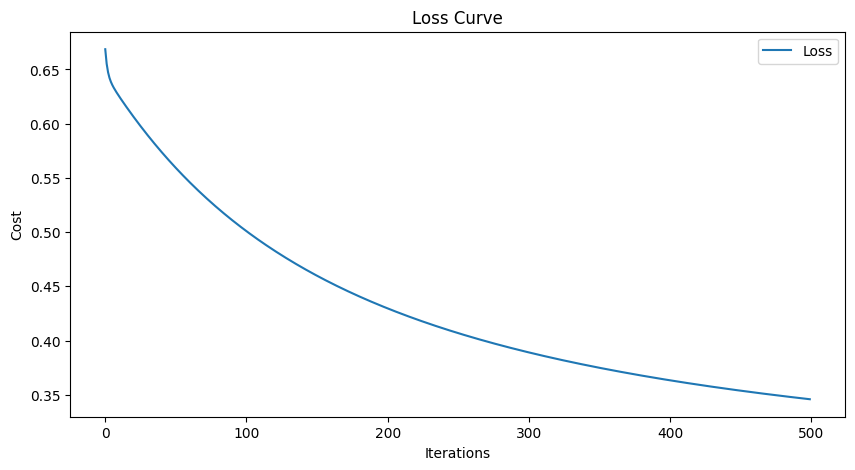

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(range(n_iterations), cost_history, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Loss Curve")
plt.legend()
plt.show()

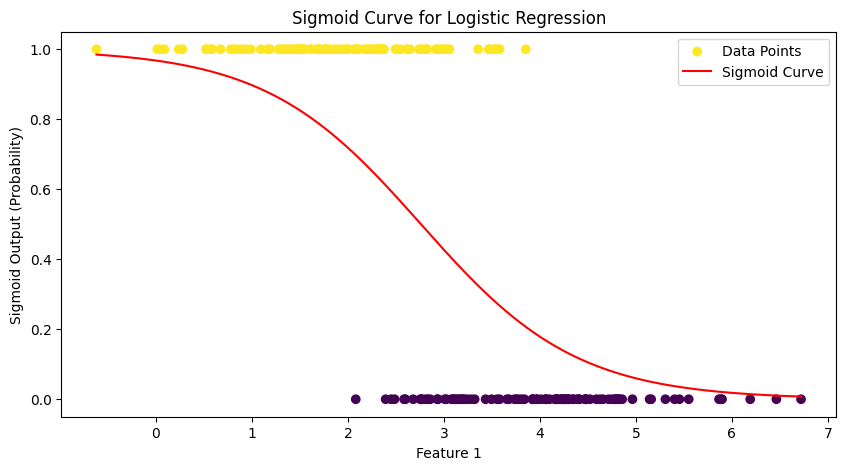

In [23]:
x_range = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 500)

X_sigmoid = np.c_[np.ones(x_range.shape[0]), x_range]  # Add bias term
y_sigmoid = sigmoid(np.dot(X_sigmoid, theta))  # Compute sigmoid predictions

# Plot the sigmoid curve
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], y, c=y, cmap='viridis', label="Data Points")  # Original data points
plt.plot(x_range, y_sigmoid, label="Sigmoid Curve", color="red")  # Sigmoid curve
plt.xlabel("Feature 1")
plt.ylabel("Sigmoid Output (Probability)")
plt.title("Sigmoid Curve for Logistic Regression")
plt.legend()
plt.show()